In [1]:
import os
import sys

import networkx
import matplotlib
import matplotlib.pyplot

import functions.io
import functions.graphs
import config

%matplotlib inline

In [2]:
def get_sample_status(x):
    """Convenience function to create column with sample status"""

    status_int = int(x.split("_")[2])
    
    if status_int <= 3:
        status = 'CTRL'
    elif 3 < status_int <= 6:
        status = 'DIABETES'

    return status


def apply_color(x):
    """Convenience function to create a column of strings of colors"""

    if x is np.nan:
        col = 'black'
    else:
        col = 'red'

    return col

In [3]:
data = functions.io.read_all_samples(config.Config.DATA_DIRECTORY)

In [4]:
samples = functions.io.get_sample_names(data)

## Analyse Sample

In [5]:
# choose the most frequent sequences and drop the rest
max_seqs = config.Config.MAX_SEQS
# join a pair of sequences only if they are within max_weight Levenshtein (edit) distance
max_weight = config.Config.MAX_WEIGHT

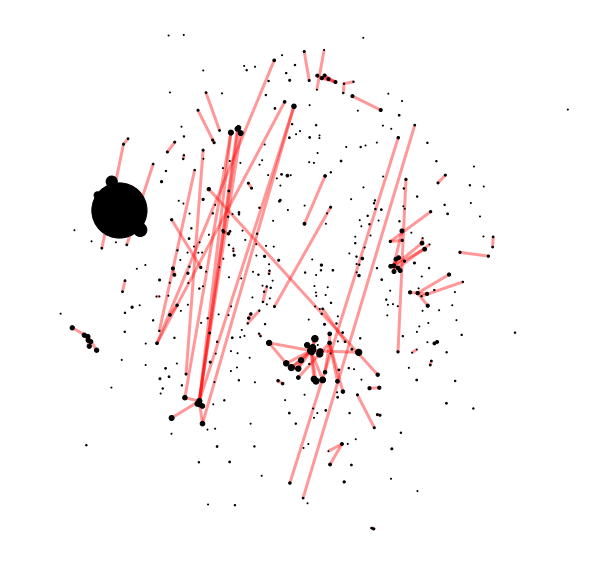

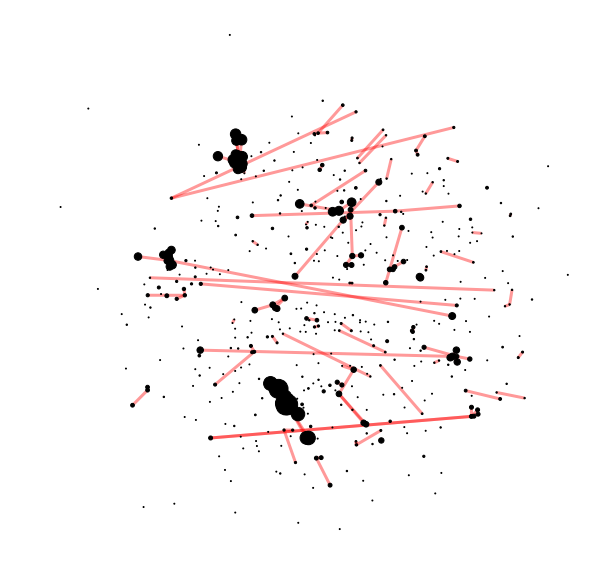

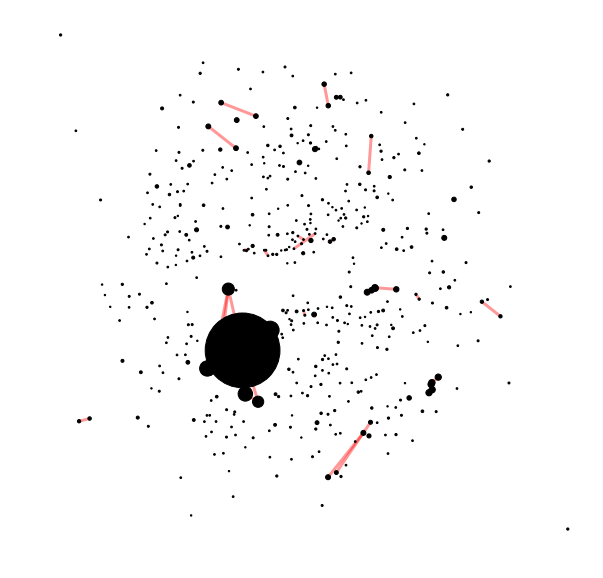

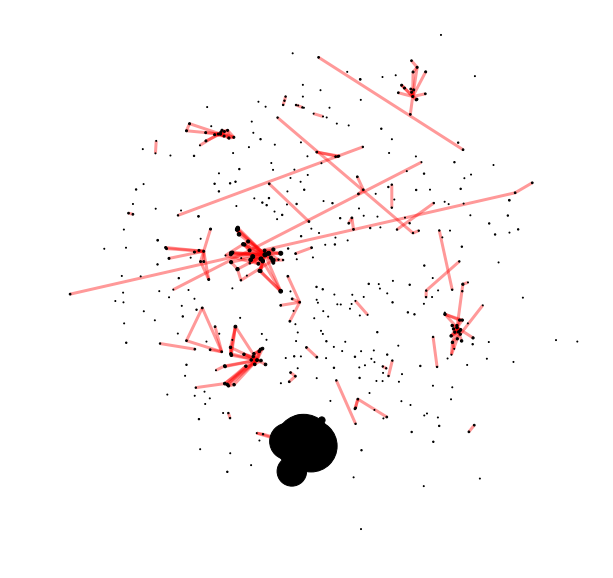

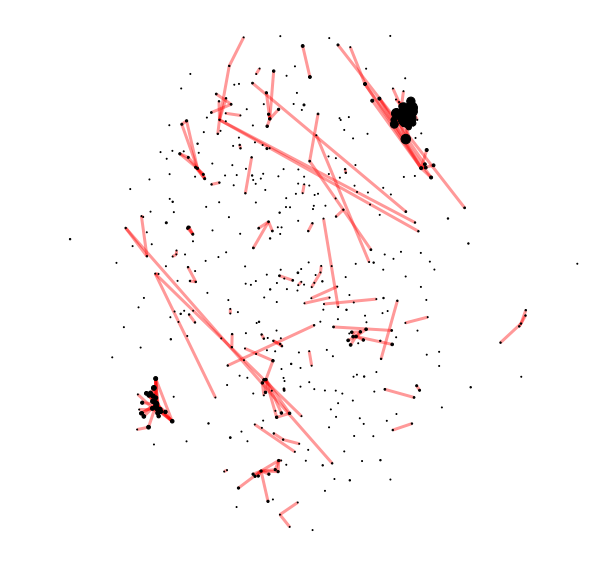

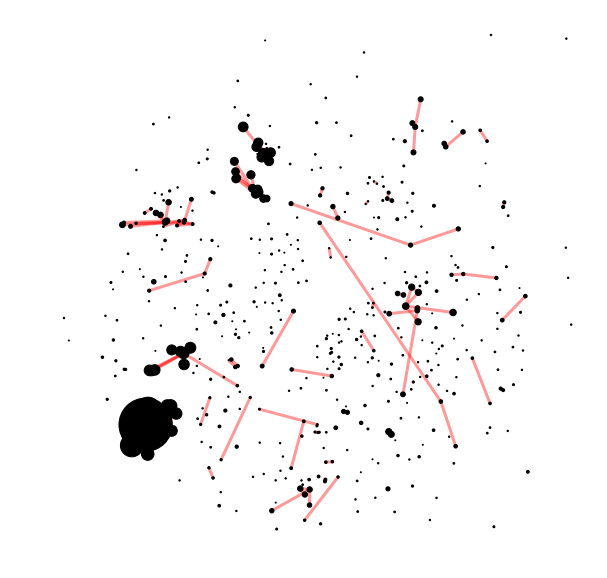

In [6]:
# Plot networks for each sample

for i in range(len(samples)):
    
    sample_data = data[data['sample']==samples[i]]
    seqs = sample_data['seq'].tolist()[0:max_seqs]
    counts = sample_data['count'].tolist()

    dists = functions.graphs.get_distances(seqs)
    coords = functions.graphs.get_dimension_mapping(dists)

    G = functions.graphs.get_graph(seqs, dists, max_weight=max_weight)
    functions.graphs.plot_graph(G, coords, seqs, counts, config.Config.OUTPUT_DIRECTORY+samples[i])

In [7]:
# Calculate the "connectedness" of each sample
# i.e. how many distinct components (subgraphs) exist
# when edges are drawn between a pair of CDR3 sequences
# only if the Levenshtein distance is less than a given
# value

connectedness = {}
mw = 10

for i in range(len(samples)):
    
    sample_data = data[data['sample']==samples[i]]
    seqs = sample_data['seq'].tolist()
    counts = sample_data['count'].tolist()

    dists = functions.graphs.get_distances(seqs)
    
    diversity = {}

    for w in range(0,mw):

        G = functions.graphs.get_graph(seqs, dists, max_weight=w)
        num_components = len(list(networkx.connected_components(G)))

        diversity[w] = num_components/len(seqs)

    x = [k for k in diversity.keys()]
    y = [v for v in diversity.values()]
    
    connectedness[samples[i]] = (x,y)

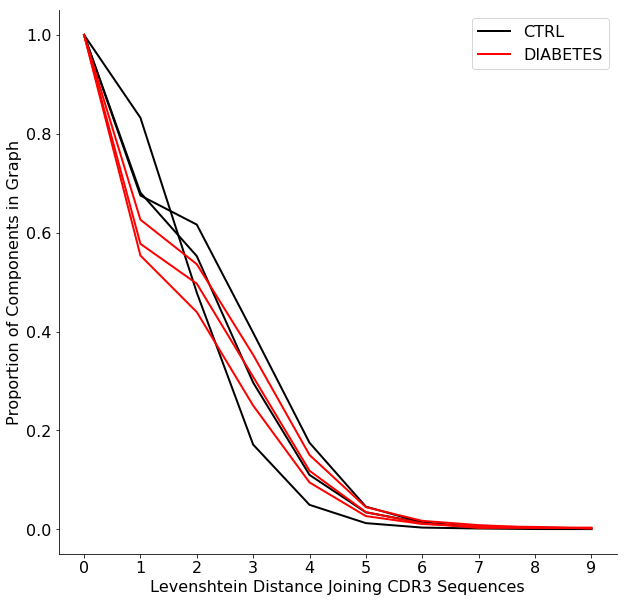

In [8]:
# Plot the results of the above

matplotlib.rcParams.update({'font.size': 16})
fig, ax = matplotlib.pyplot.subplots(figsize=(10,10))

for k, v in connectedness.items():
    
    if int(k.split('_')[2]) <= 3:
        x = v[0]
        y = v[1]
        ax.plot(x,y,color='black',lw=2)
    else:
        x = v[0]
        y = v[1]
        ax.plot(x,y,color='red',lw=2)
    
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set(xlabel='Levenshtein Distance Joining CDR3 Sequences', ylabel='Proportion of Components in Graph')
custom_lines = [matplotlib.lines.Line2D([0], [0], color='black', lw=2),
                matplotlib.lines.Line2D([0], [0], color='red', lw=2)]
ax.legend(custom_lines, ['CTRL', 'DIABETES'])
matplotlib.pyplot.show()